# Importing Neccessary Libraries

### Written by Nafisa Anjum

# Myers-Briggs Type Indicator (MBTI)

The Myers-Briggs Type Indicator (MBTI) is a popular personality assessment tool based on Carl Jung’s theory of psychological types. It categorizes individuals into one of 16 distinct personality types based on their preferences in four dichotomies:

1. **Introversion (I) vs. Extraversion (E)**
   - **Introverts (I)**: Energized by solitary activities, require time alone to recharge.
   - **Extraverts (E)**: Energized by interactions with others, seek out social engagement.


2. **Sensing (S) vs. Intuition (N)**
   - **Sensors (S)**: Focus on concrete, tangible details and present realities.
   - **Intuitives (N)**: Interested in abstract concepts and future possibilities.
   

3. **Thinking (T) vs. Feeling (F)**
   - **Thinkers (T)**: Prioritize logic and objective criteria in decision-making.
   - **Feelers (F)**: Base decisions on personal values and how they affect others.
   

4. **Judging (J) vs. Perceiving (P)**
   - **Judgers (J)**: Prefer structure, order, and decisiveness.
   - **Perceivers (P)**: More adaptable, spontaneous, and open to new information.

## Personality Types

Combining these preferences results in 16 distinct personality types:

1. **ISTJ (Introverted, Sensing, Thinking, Judging)**: The Inspector - Responsible, organized, and practical.

2. **ISFJ (Introverted, Sensing, Feeling, Judging)**: The Protector - Compassionate, detail-oriented, and loyal.

3. **INFJ (Introverted, Intuition, Feeling, Judging)**: The Advocate - Idealistic, insightful, and principled.

4. **INTJ (Introverted, Intuition, Thinking, Judging)**: The Architect - Strategic, analytical, and independent.

5. **ISTP (Introverted, Sensing, Thinking, Perceiving)**: The Virtuoso - Adventurous, logical, and hands-on.

6. **ISFP (Introverted, Sensing, Feeling, Perceiving)**: The Composer - Artistic, gentle, and spontaneous.

7. **INFP (Introverted, Intuition, Feeling, Perceiving)**: The Mediator - Creative, empathetic, and idealistic.

8. **INTP (Introverted, Intuition, Thinking, Perceiving)**: The Logician - Curious, analytical, and independent.

9. **ESTP (Extraverted, Sensing, Thinking, Perceiving)**: The Entrepreneur - Energetic, pragmatic, and action-oriented.

10. **ESFP (Extraverted, Sensing, Feeling, Perceiving)**: The Entertainer - Sociable, lively, and spontaneous.

11. **ENFP (Extraverted, Intuition, Feeling, Perceiving)**: The Campaigner - Enthusiastic, imaginative, and sociable.

12. **ENTP (Extraverted, Intuition, Thinking, Perceiving)**: The Debater - Innovative, energetic, and intellectually curious.

13. **ESTJ (Extraverted, Sensing, Thinking, Judging)**: The Executive - Organized, assertive, and pragmatic.

14. **ESFJ (Extraverted, Sensing, Feeling, Judging)**: The Consul - Caring, social, and organized.

15. **ENFJ (Extraverted, Intuition, Feeling, Judging)**: The Protagonist - Charismatic, empathetic, and organized.

16. **ENTJ (Extraverted, Intuition, Thinking, Judging)**: The Commander - Confident, strategic, and decisive.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action = 'ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


from IPython.core.display import display, HTML

# Reading the Dataset

In [3]:
data = pd.read_csv('data/data.csv')

# Sanity check 

In [4]:
data.shape

(43744, 9)

In [5]:
# to get first five rows
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB


In [6]:
data.columns

Index(['Age', 'Gender', 'Education', 'Introversion Score', 'Sensing Score',
       'Thinking Score', 'Judging Score', 'Interest', 'Personality'],
      dtype='object')

In [8]:
data.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

# Exploratory Data Analysis

In [7]:
# descriptive statistics
data.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
Age,43744.0,27.437203,4.893805,18.00000,24.000000,27.000000,30.000000,52.000000
Education,43744.0,0.229014,0.420203,0.00000,0.000000,0.000000,0.000000,1.000000
Introversion Score,43744.0,4.588349,2.902628,0.00015,2.067020,4.261680,7.085002,9.999920
Sensing Score,43744.0,5.780074,1.241648,0.00000,4.953340,6.162928,6.622978,9.803837
Thinking Score,43744.0,5.419131,2.900785,0.00032,2.895750,5.769870,7.923503,9.999770
Judging Score,43744.0,5.391041,1.442413,0.00000,4.511842,5.771635,6.409583,10.000000


In [31]:
from collections import Counter

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, label_type=location, rotation=rotation)
    axes.set_yticklabels(())
    axes.set_xlabel("")
    axes.set_ylabel("")

In [33]:
cats = ["Gender", "Education", "Interest", "Personality"]
nums = [i for i in data.columns if i not in cats]

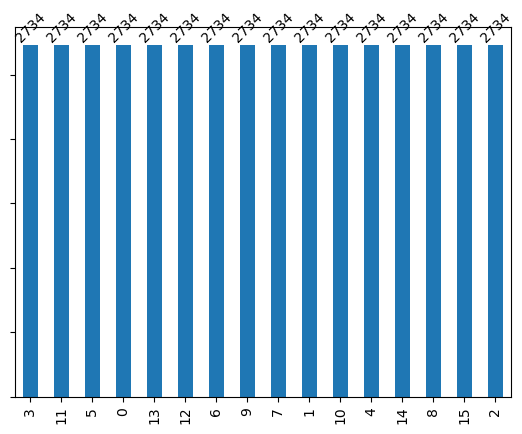

In [34]:
fig, axes = plt.subplots()
data[cats[-1]].value_counts().plot(kind="bar", ax=axes)
bar_labels(axes, 45)
plt.show()

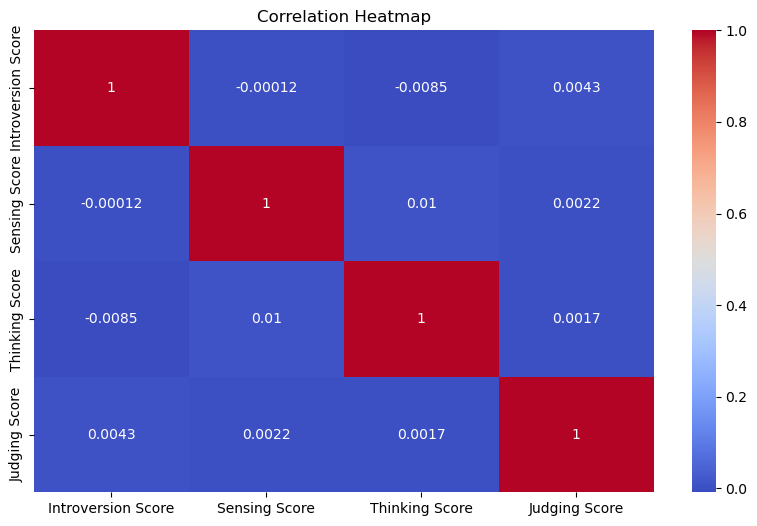

In [11]:
# Plot correlation heatmap of numerical features
plt.figure(figsize=(10,6))
sns.heatmap(data[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

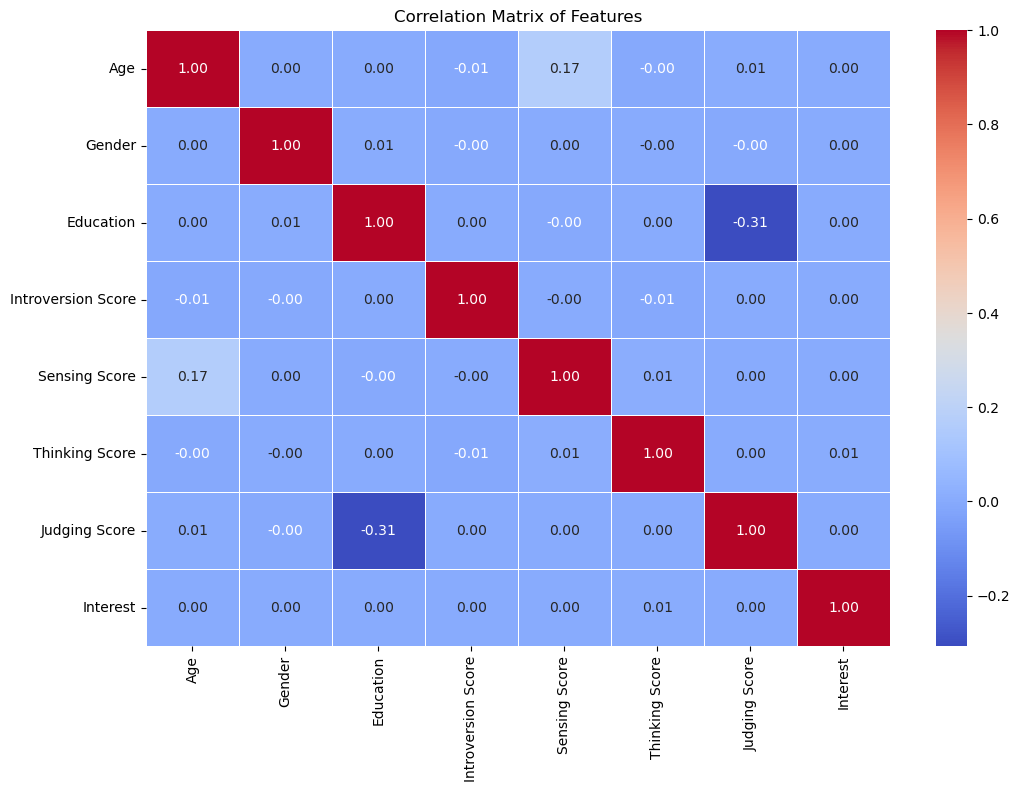

In [18]:
# Encode categorical variables (Gender, Interest, Education, Personality)
label_encoders = {}
for column in ['Gender', 'Interest', 'Education', 'Personality']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['Personality']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

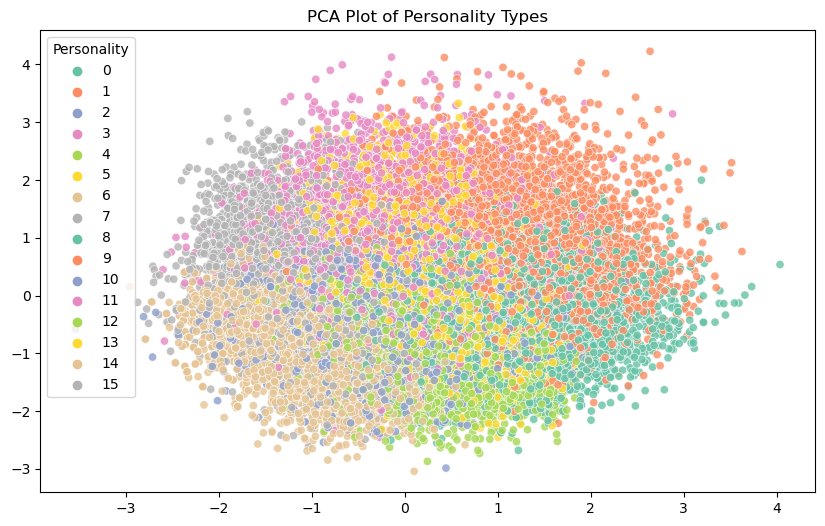

In [21]:
# Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA

scaler = StandardScaler()

# Standardize features
X_scaled = scaler.fit_transform(data[numerical_features])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Plot PCA components with Personality types
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=data['Personality'], palette='Set2', alpha=0.8)
plt.title('PCA Plot of Personality Types')
plt.show()

In [22]:
# Split dataset into features (X) and target (y)
X = data.drop('Personality', axis=1)
y = data['Personality']

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
X_train[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']] = scaler.fit_transform(round(X_train[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']],5))
X_test[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']] = scaler.transform(round(X_test[['Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']], 5))

In [25]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8989575713240673

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       656
           1       0.92      0.86      0.89       648
           2       0.92      0.91      0.91       699
           3       0.91      0.84      0.87       705
           4       0.88      0.90      0.89       694
           5       0.90      0.89      0.90       664
           6       0.94      0.91      0.92       725
           7       0.89      0.91      0.90       674
           8       0.93      0.89      0.91       667
           9       0.89      0.91      0.90       697
          10       0.94      0.89      0.91       681
          11       0.87      0.87      0.87       690
          12       0.86      0.91      0.89       706
          13       0.86      0.92      0.89       668
          14       0.89      0.97      0.93       663
          15       0.87      0.92      0.89       699

    accuracy              

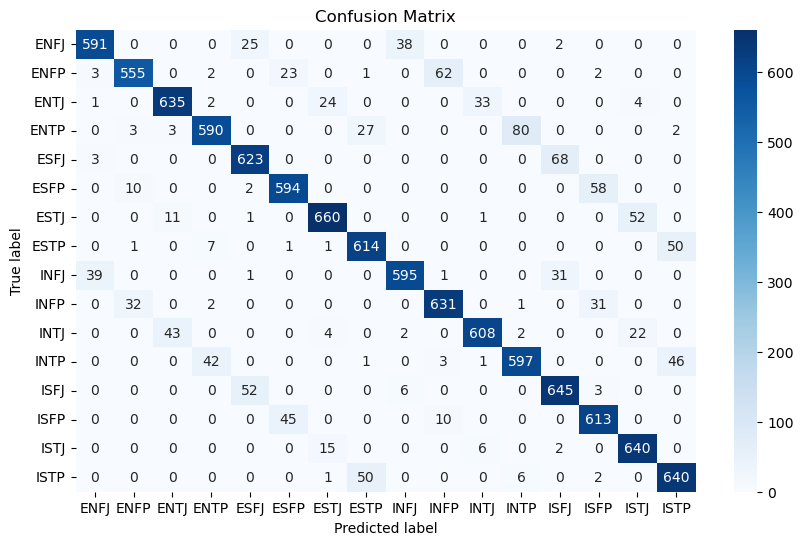

In [27]:
# Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Personality'].classes_, yticklabels=label_encoders['Personality'].classes_)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

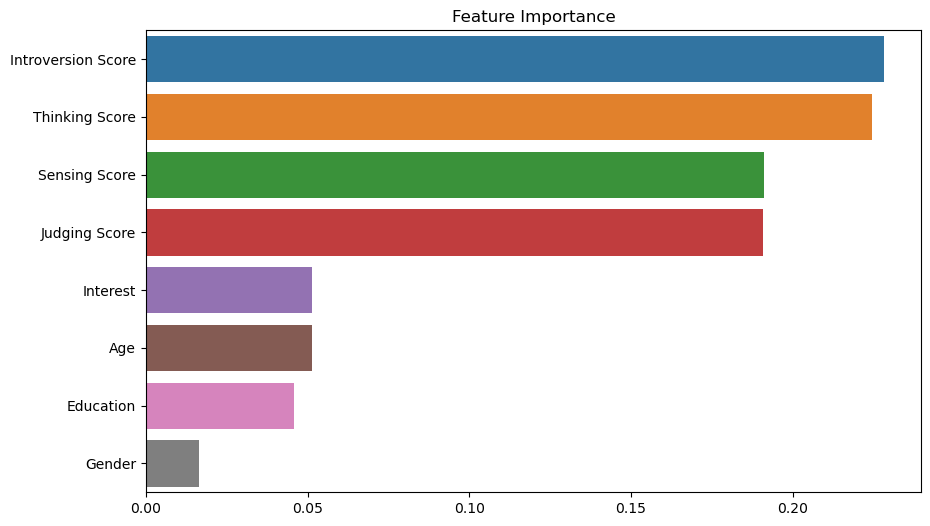

In [28]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.show()

In [35]:
!pip install wolta

  Obtaining dependency information for wolta from https://files.pythonhosted.org/packages/b5/22/6d058a0dfabc2425e1b173d4e094cad928b2abe0a1d8d2d983fcbdfcd396/wolta-0.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for hyperopt from https://files.pythonhosted.org/packages/b6/cd/5b3334d39276067f54618ce0d0b48ed69d91352fbf137468c7095170d0e5/hyperopt-0.2.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/ae/48/f1d7b4b37f9e56ce6b2c0471465d6877fb475e0ac9cf1bc463517b2f4a82/catboost-1.2.8-cp311-cp311-macosx_11_0_universal2.whl.metadata
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/21/1b/550ee378512b78847930f5d74228ca1fdba2a7fbdeaac9aeccc085b0e257/lightgbm-4.6.0

In [36]:
from wolta.data_tools import col_types

types = col_types(data, print_columns=True)

Age: float64
Gender: int64
Education: int64
Introversion Score: float64
Sensing Score: float64
Thinking Score: float64
Judging Score: float64
Interest: int64
Personality: int64


In [37]:
from wolta.data_tools import seek_null

seeked = seek_null(data, print_columns=True)

In [38]:
from wolta.data_tools import unique_amounts

unique_amounts(data)

{'Age': 35,
 'Gender': 2,
 'Education': 2,
 'Introversion Score': 41766,
 'Sensing Score': 42715,
 'Thinking Score': 41848,
 'Judging Score': 42661,
 'Interest': 5,
 'Personality': 16}

In [39]:
from wolta.data_tools import make_numerics

data['Gender'] = make_numerics(data['Gender'])
data['Interest'] = make_numerics(data['Interest'])
data['Personality'] = make_numerics(data['Personality'])

<Axes: ylabel='count'>

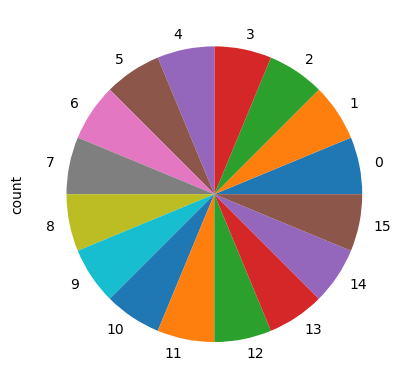

In [40]:
data['Personality'].value_counts().plot(kind='pie')

In [41]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({1: 2086, 0: 2078, 14: 2071, 5: 2070, 8: 2067, 13: 2066, 7: 2060, 10: 2053, 11: 2044, 4: 2040, 9: 2037, 15: 2035, 2: 2035, 3: 2029, 12: 2028, 6: 2009})
Counter({6: 725, 12: 706, 3: 705, 2: 699, 15: 699, 9: 697, 4: 694, 11: 690, 10: 681, 7: 674, 13: 668, 8: 667, 5: 664, 14: 663, 0: 656, 1: 648})


In [42]:
from wolta.model_tools import compare_models

models = compare_models('clf',
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                       ['acc', 'precision'],
                       X_train, y_train, X_test, y_test,
                       get_result=True)

AdaBoost
Accuracy Score: 0.2609729334308705
Precision Score: 0.572904905401384
***
CatBoost
Accuracy Score: 0.8964886613021215
Precision Score: 0.8971921751861363
***
LightGBM
Accuracy Score: 0.8905449890270666
Precision Score: 0.8915015924469966
***
Random Forest
Accuracy Score: 0.8999634235552304
Precision Score: 0.9011497874534896
***
Decision Tree
Accuracy Score: 0.8617410387710315
Precision Score: 0.8620983410826695
***
Extra Tree
Accuracy Score: 0.5817483540599854
Precision Score: 0.5807580953983458
***
Ridge
Accuracy Score: 0.7346378931967813
Precision Score: 0.7615384116689646
***
Perceptron
Accuracy Score: 0.43489392831016827
Precision Score: 0.6177280806563187
***


In [43]:
from wolta.model_tools import get_best_model

model = get_best_model(models, 'acc', 'clf', X_train, y_train, behavior='max-best')
y_pred = model.predict(X_test)

Best Algorithm is raf with the score of 0.8999634235552304


In [44]:
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       656
           1       0.93      0.86      0.89       648
           2       0.91      0.91      0.91       699
           3       0.93      0.84      0.88       705
           4       0.88      0.90      0.89       694
           5       0.89      0.90      0.89       664
           6       0.94      0.91      0.92       725
           7       0.89      0.92      0.90       674
           8       0.93      0.90      0.92       667
           9       0.88      0.90      0.89       697
          10       0.94      0.89      0.91       681
          11       0.87      0.87      0.87       690
          12       0.87      0.92      0.89       706
          13       0.86      0.91      0.89       668
          14       0.89      0.97      0.93       663
          15       0.87      0.92      0.89       699

    accuracy                           0.90     10936
   macro avg       0.90   

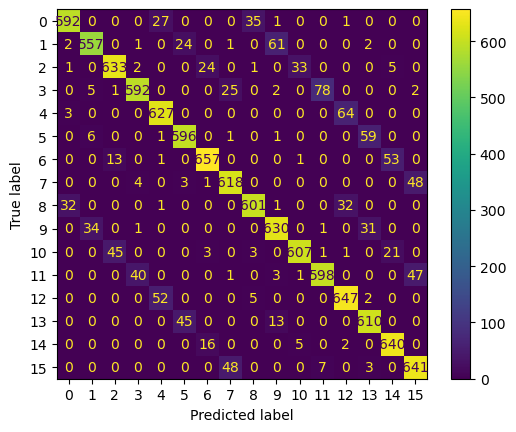

In [45]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()